In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

In [25]:
register_matplotlib_converters()

In [26]:
# Your local file path
file_path = r'C:\Users\ponia\OneDrive\Desktop\lidocaine plaster analysis\Updated_Lidocaine_Patches_Final.csv'

In [27]:
# Load the data
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'], dayfirst=True)

In [28]:
# Grouping data for all years
trend_data = data.groupby(['Health Board', 'date']).agg({'Items': 'sum', 'ActCost': 'sum', 'Quantity': 'sum'}).reset_index()

In [29]:
# Formatter and locator for the dates (every 3 months)
date_form = mdates.DateFormatter("%Y-%m")
quarterly_locator = mdates.MonthLocator(interval=3)

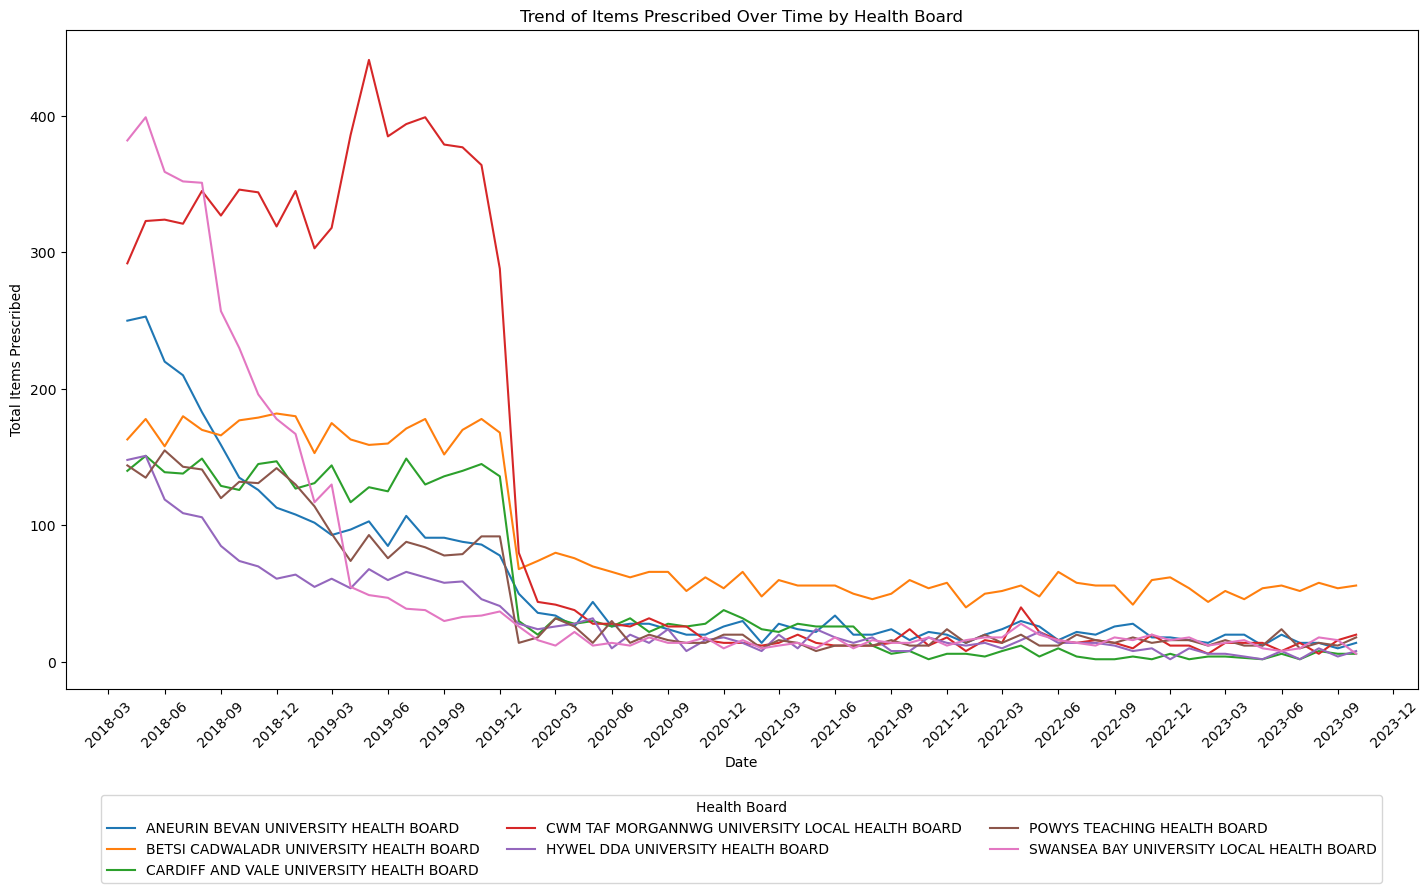

In [30]:
# Plotting trends over time for each health board
plt.figure(figsize=(15, 10))
sns.lineplot(x='date', y='Items', hue='Health Board', data=trend_data)
plt.title('Trend of Items Prescribed Over Time by Health Board')
plt.xlabel('Date')
plt.ylabel('Total Items Prescribed')
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(quarterly_locator)
plt.xticks(rotation=45)
plt.legend(title='Health Board', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

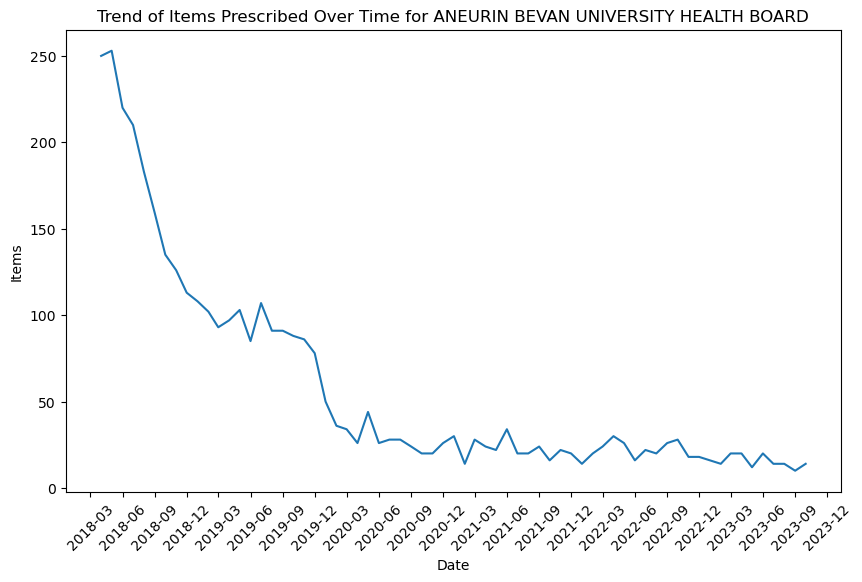

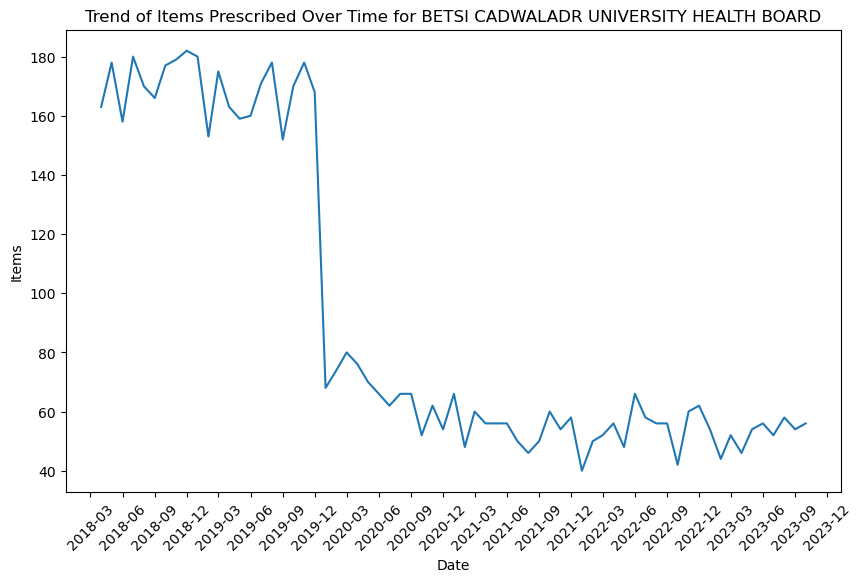

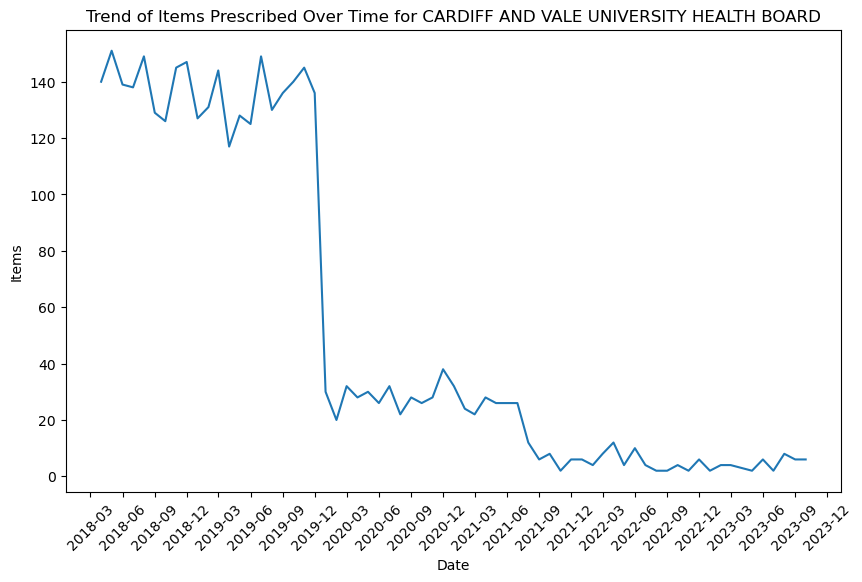

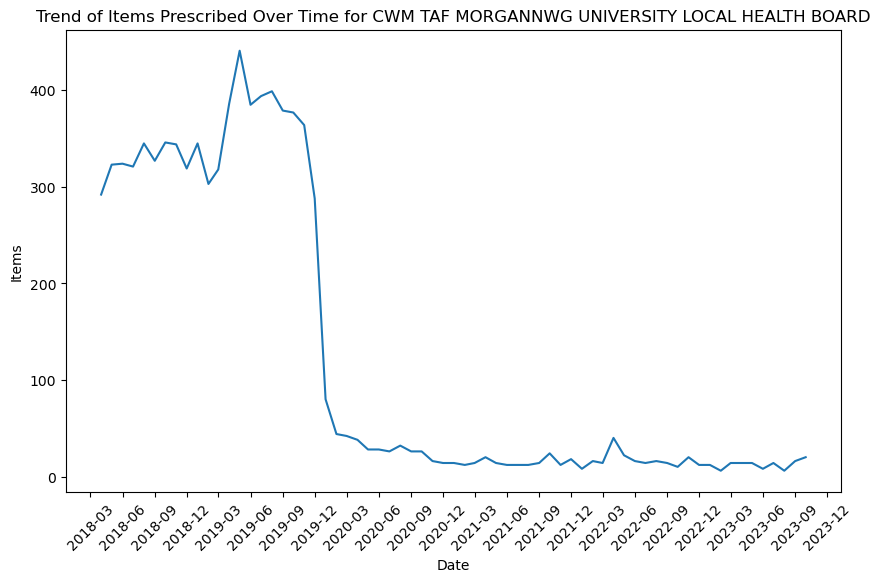

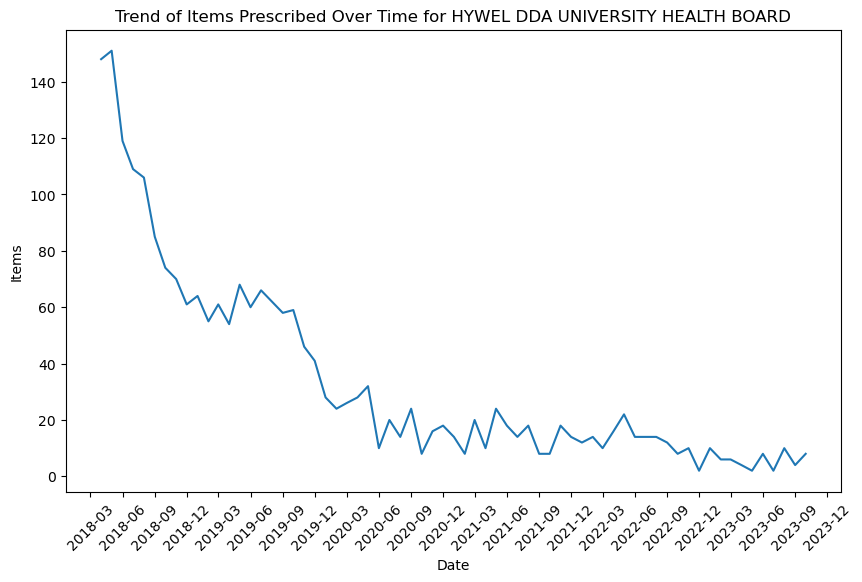

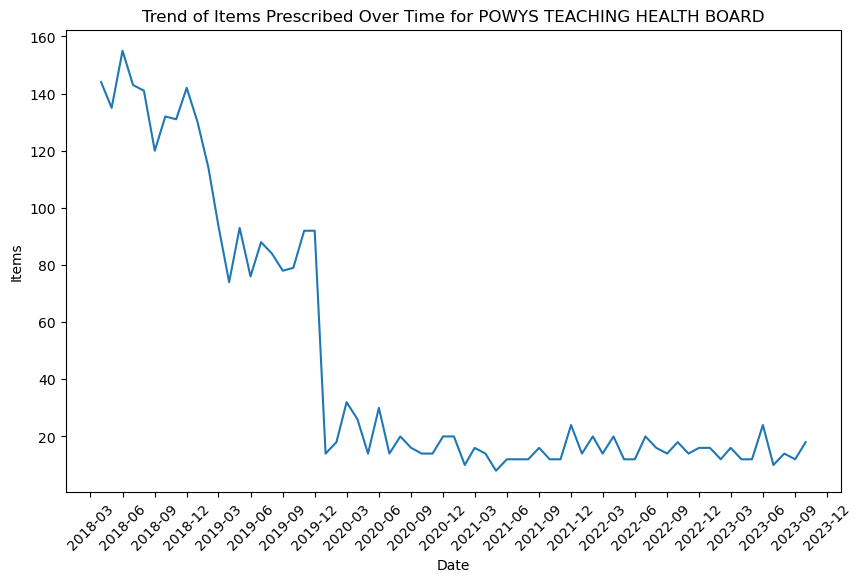

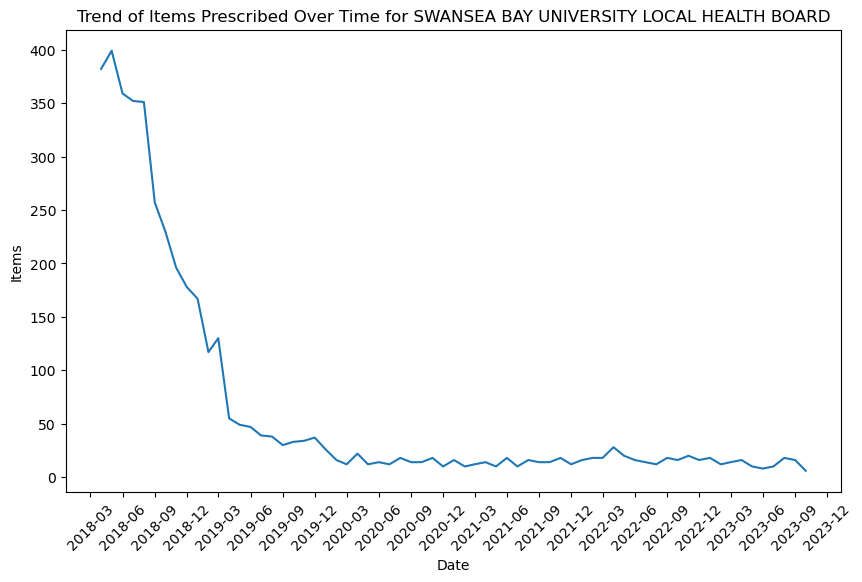

In [31]:
# Separate analysis for each Health Board
for health_board in trend_data['Health Board'].unique():
    board_data = trend_data[trend_data['Health Board'] == health_board]
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y='Items', data=board_data)
    plt.title(f'Trend of Items Prescribed Over Time for {health_board}')
    plt.xlabel('Date')
    plt.ylabel('Items')
    plt.gca().xaxis.set_major_formatter(date_form)
    plt.gca().xaxis.set_major_locator(quarterly_locator)
    plt.xticks(rotation=45)
    plt.show()

In [32]:
# Create a DataFrame for data from 2020 onwards
data_2020_onwards = data[data['date'].dt.year >= 2020]
trend_data_2020_onwards = data_2020_onwards.groupby(['Health Board', 'date']).agg({'Items': 'sum', 'ActCost': 'sum', 'Quantity': 'sum'}).reset_index()

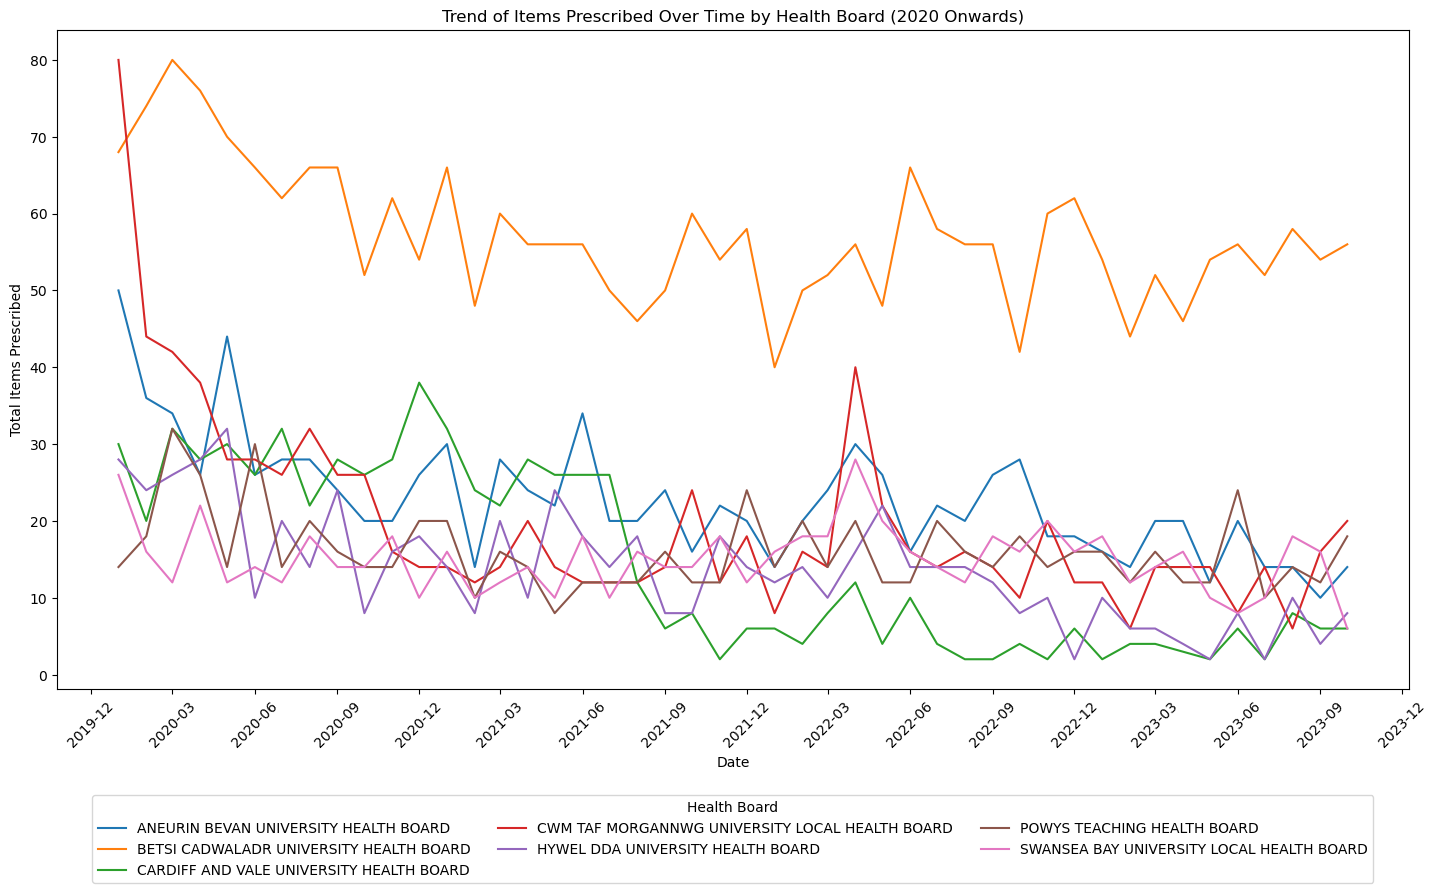

In [33]:
# Plotting trends over time for each health board (2020 onwards)
plt.figure(figsize=(15, 10))
sns.lineplot(x='date', y='Items', hue='Health Board', data=trend_data_2020_onwards)
plt.title('Trend of Items Prescribed Over Time by Health Board (2020 Onwards)')
plt.xlabel('Date')
plt.ylabel('Total Items Prescribed')
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(quarterly_locator)
plt.xticks(rotation=45)
plt.legend(title='Health Board', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

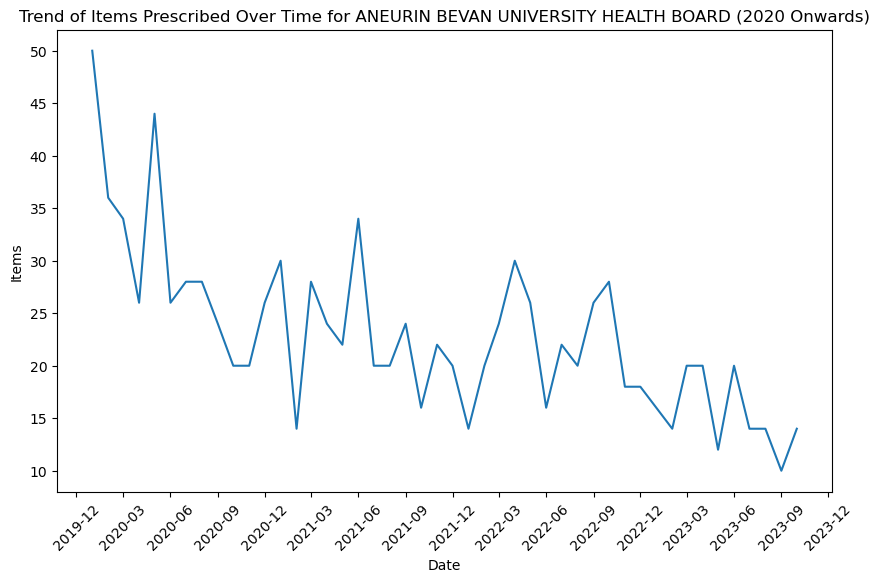

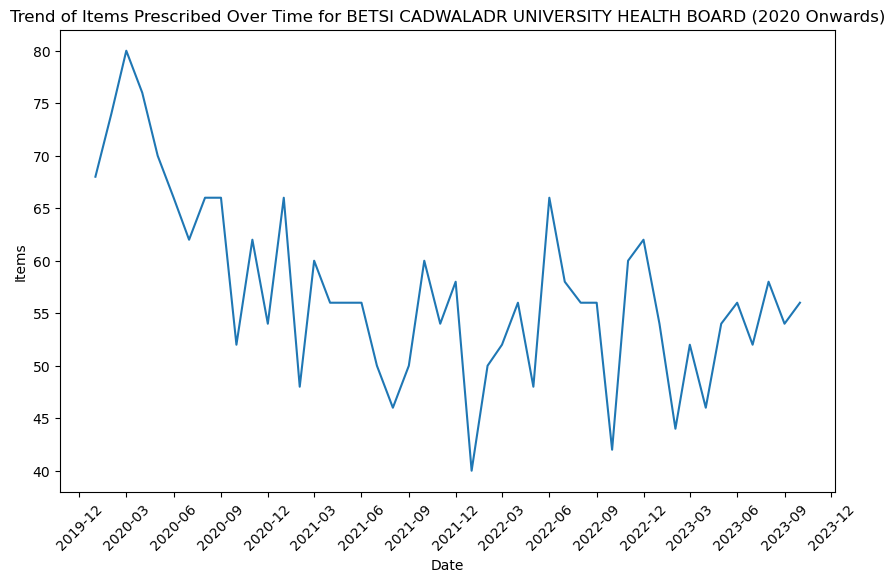

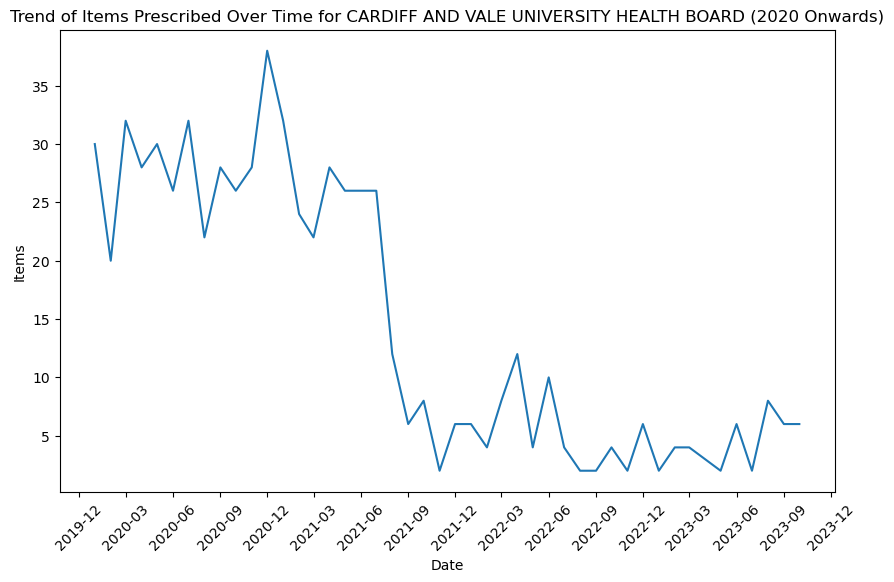

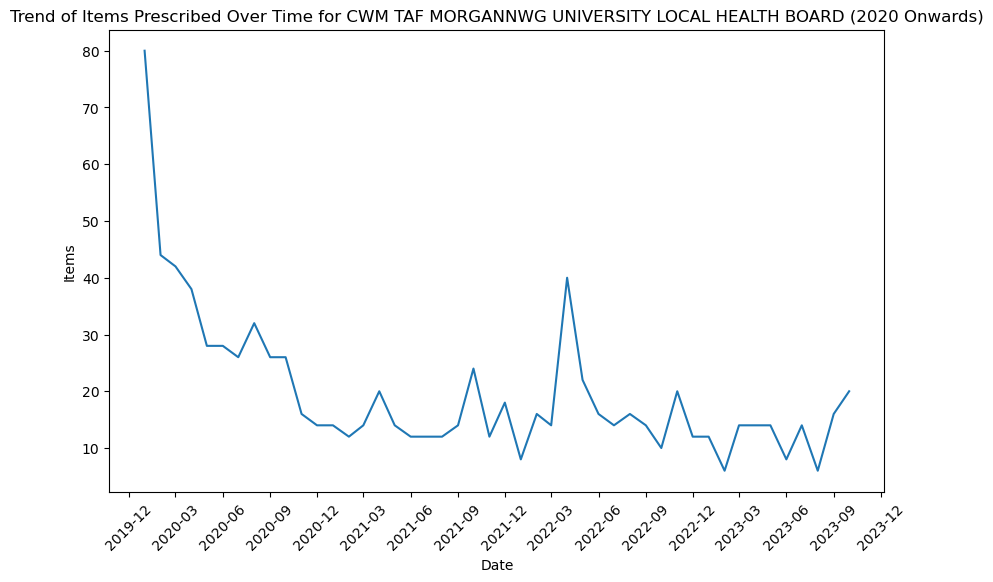

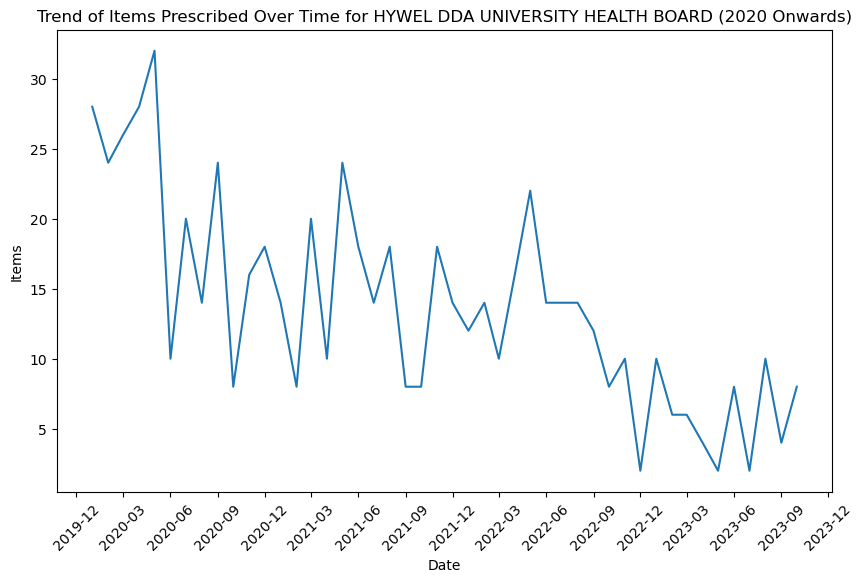

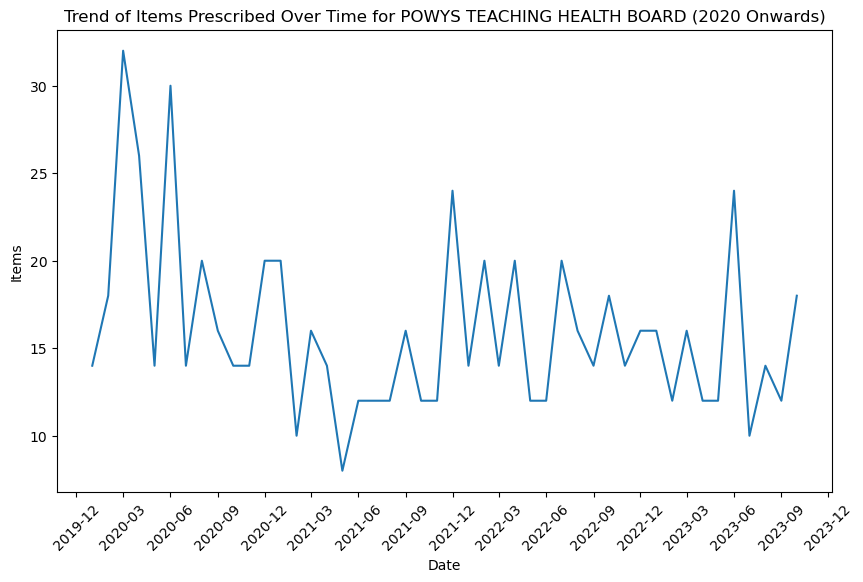

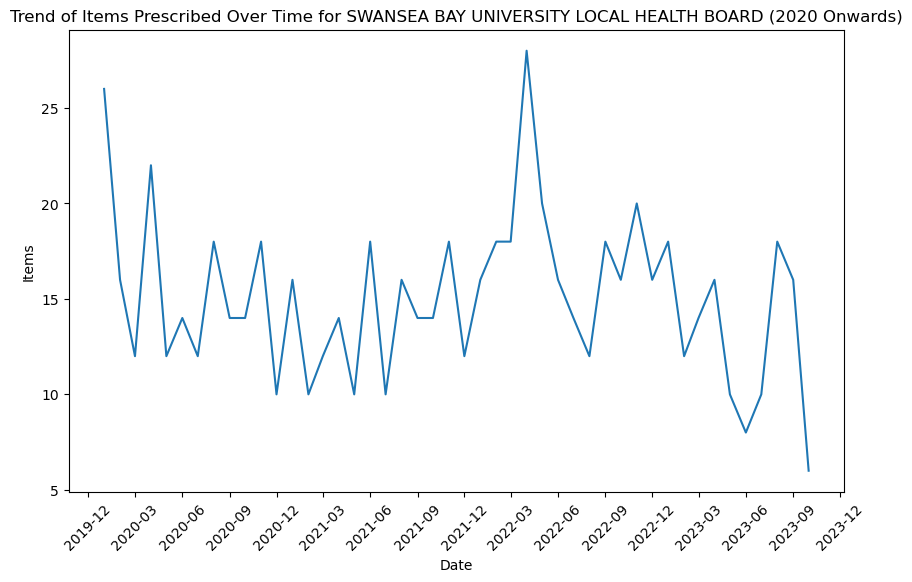

In [34]:
# Separate analysis for each Health Board (2020 onwards)
for health_board in trend_data_2020_onwards['Health Board'].unique():
    board_data = trend_data_2020_onwards[trend_data_2020_onwards['Health Board'] == health_board]
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y='Items', data=board_data)
    plt.title(f'Trend of Items Prescribed Over Time for {health_board} (2020 Onwards)')
    plt.xlabel('Date')
    plt.ylabel('Items')
    plt.gca().xaxis.set_major_formatter(date_form)
    plt.gca().xaxis.set_major_locator(quarterly_locator)
    plt.xticks(rotation=45)
    plt.show()